# Exploratory Data Analysis (EDA) Image Analysis 

## Emotion Face Classifier Notebook 3

Visuals example images, image properties, and uses unsupervised models for feature extraction

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
from IPython.display import display

In [5]:
import os
import pandas as pd

In [6]:
from datascifuncs.tidbit_tools import load_json, write_json, print_json, check_directory_name

In [7]:
main_dir = 'EmotionFaceClassifier'
check_directory_name(main_dir)

Directory set to /Users/dsl/Documents/GitHub/EmotionFaceClassifier, matches target dir string EmotionFaceClassifier.


True

In [8]:
from utils.image_processing import (
    generate_sample_images,
    generate_samples_figure,
    preprocess_images,
    generate_composite_faces,
    generate_pixel_intensities,
    run_dimensionality_reduction
)

In [9]:
# from utils.image_processing import (
#     generate_sample_images,
#     plot_matrix,
#     preprocess_images,
#     apply_ticks,
#     set_spines_and_titles_by_column,
#     add_figure_title,
#     add_text_box,
#     save_figure
# )

In [10]:
# from utils.image_processing import (
#     preprocess_images,
#     generate_sample_images,
#     plot_face_matrix,
#     generate_composite_faces,
#     run_dimensionality_reduction,
#     generate_pixel_intensities
# )

In [11]:
# Read in FER 2013 data
fer2013_path = 'data/fer2013_paths.csv'
fer2013 = pd.read_csv(fer2013_path)

In [12]:
fer2013.head()

,emotion_id,pixels,Usage,emotion,image,usage,emo_count_id,img_path,color
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,Angry,[[ 70 80 82 ... 52 43 41]\n [ 65 61 58 ...,Training,1,data/Training/Angry/Angry-1.jpg,red
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,Angry,[[151 150 147 ... 129 140 120]\n [151 149 149 ...,Training,2,data/Training/Angry/Angry-2.jpg,red
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,Fear,[[231 212 156 ... 44 27 16]\n [229 175 148 ...,Training,1,data/Training/Fear/Fear-1.jpg,slategray
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,Sad,[[ 24 32 36 ... 173 172 173]\n [ 25 34 29 ...,Training,1,data/Training/Sad/Sad-1.jpg,blue
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,Neutral,[[ 4 0 0 ... 27 24 25]\n [ 1 0 0 ... 26 23...,Training,1,data/Training/Neutral/Neutral-1.jpg,sienna


In [13]:
# Select training data
print(fer2013.shape)
train_df = fer2013[fer2013['usage']=='Training']
print(train_df.shape)

(35887, 9)
(28709, 9)


In [14]:
# Load common dicts from json config file
common_dicts = load_json('./configs/input_mappings.json')
# print_json(common_dicts)

In [15]:
# Get subset of emo-color mappings
color_dict = common_dicts['plotly_styles']['Training']['color']
color_dict

{'Angry': 'red',
 'Disgust': 'olive',
 'Fear': 'slategray',
 'Happy': 'gold',
 'Sad': 'blue',
 'Surprise': 'darkviolet',
 'Neutral': 'sienna'}

In [16]:
plot_params = load_json('./configs/plotting_params.json')

In [17]:
emo_samples = generate_sample_images(train_df, n=5, cat_col='emotion', path_col='img_path')

In [18]:
sample_imgs_save_path = os.path.join('imgs', 'comparisons', 'sample_images.png')

Figure saved to imgs/comparisons/sample_images.png


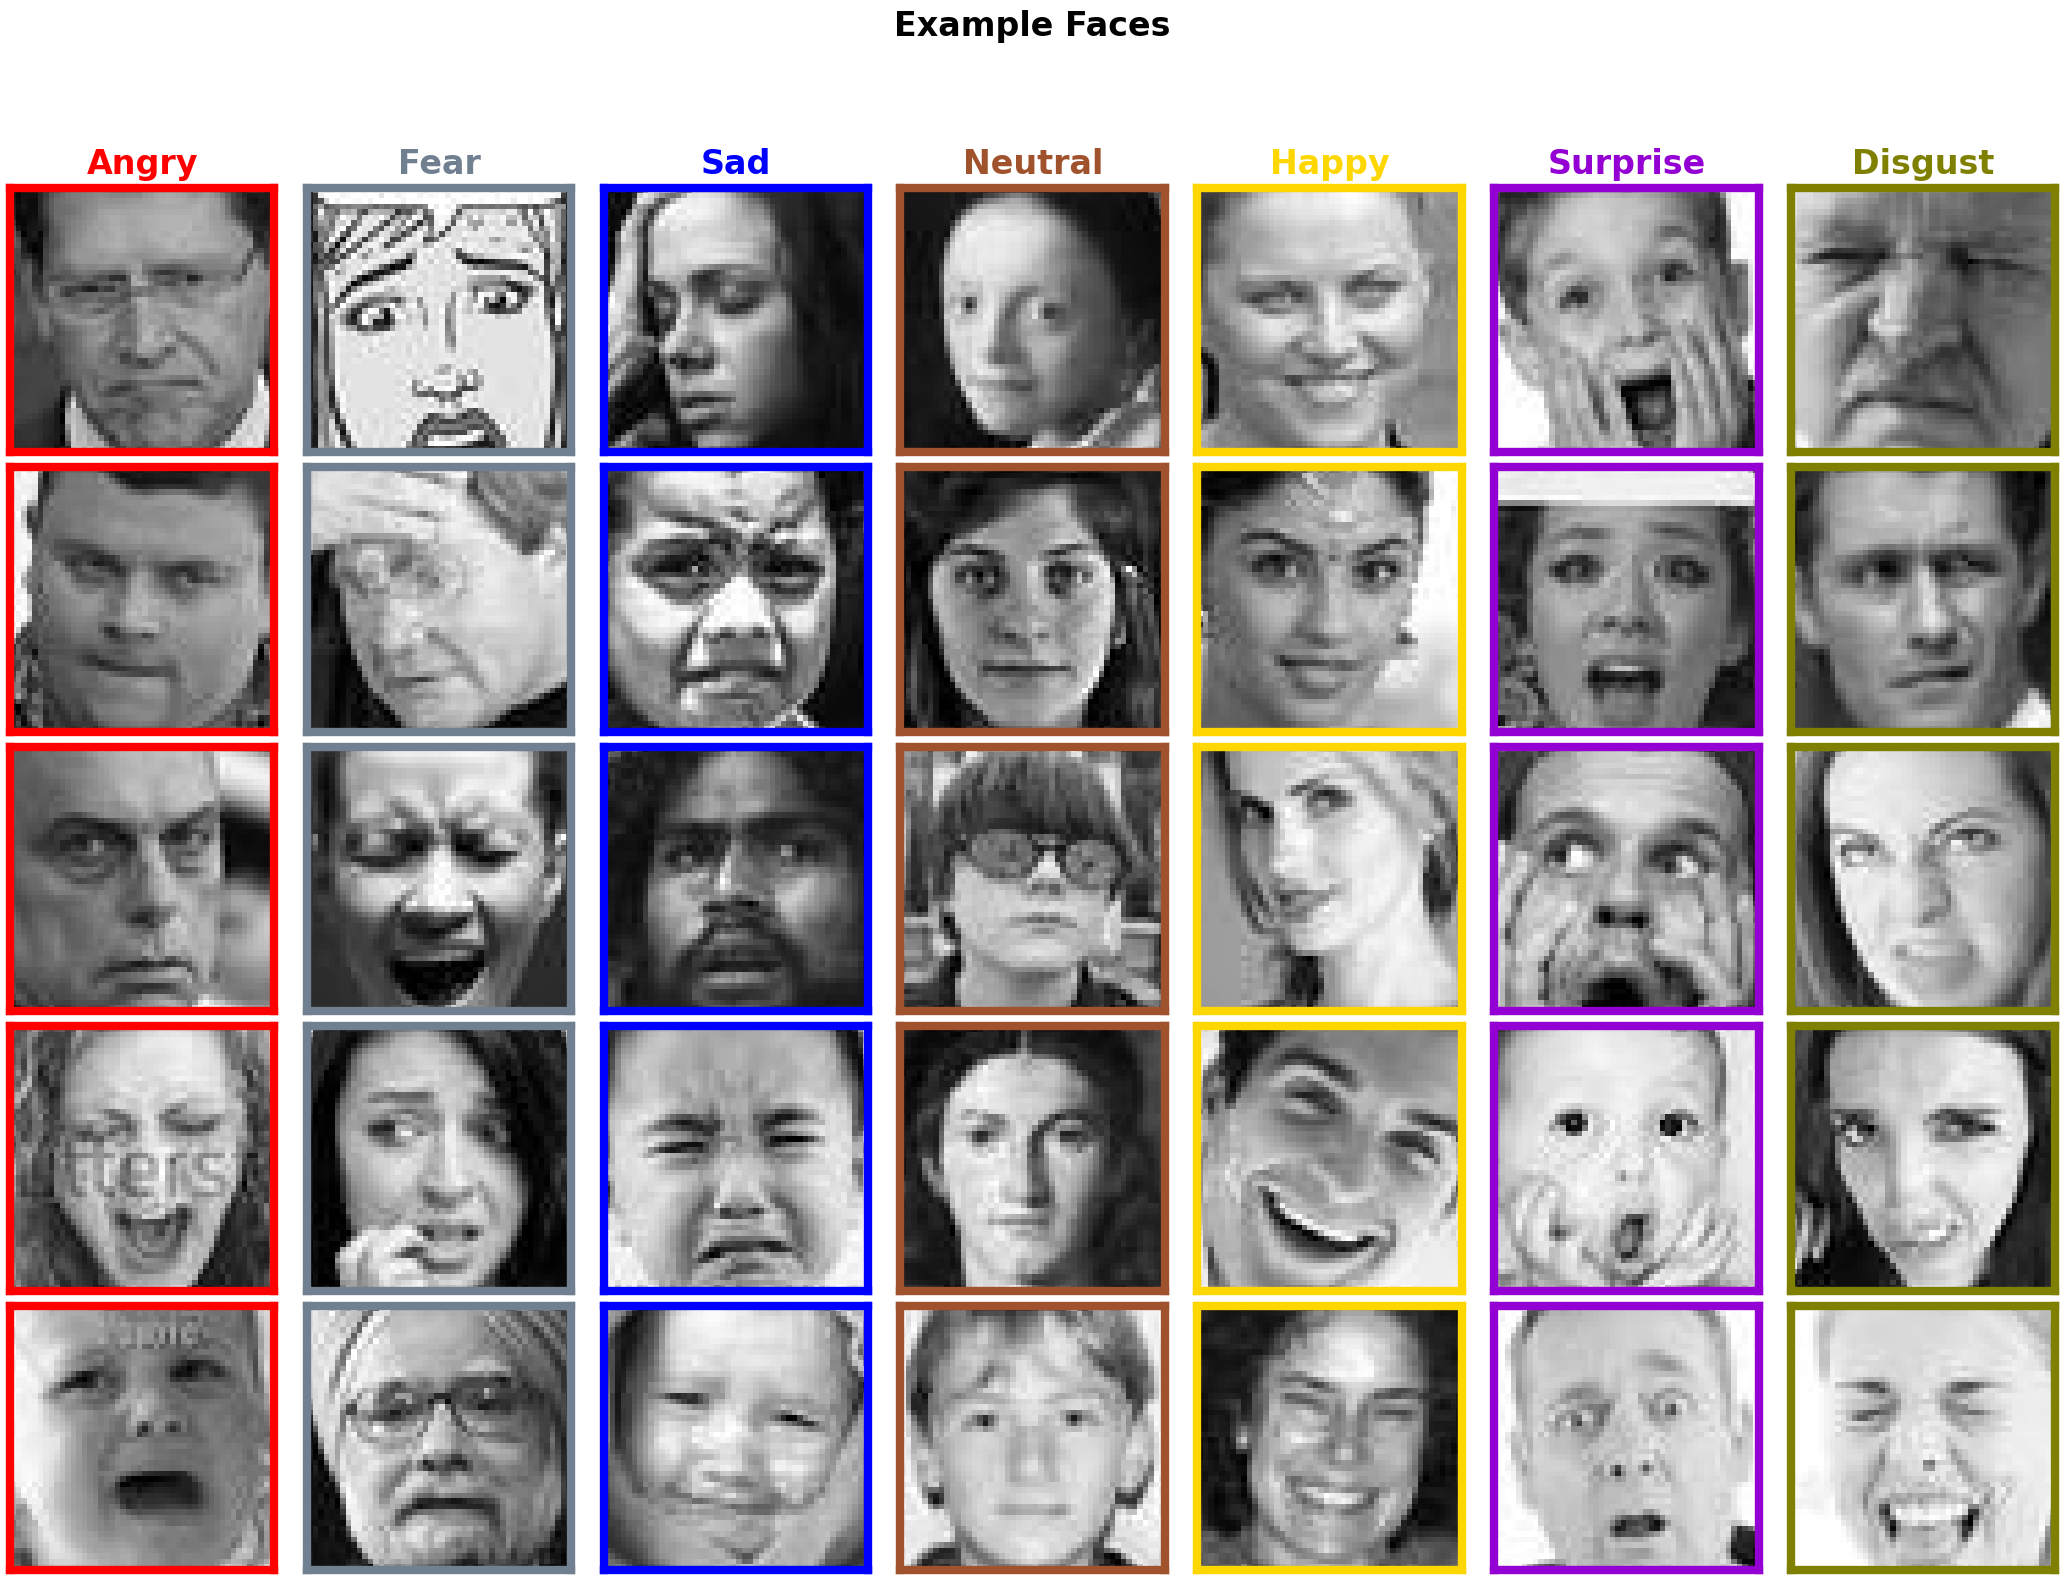

In [19]:
generate_samples_figure(
        image_dict=emo_samples, 
        row_labels=None, 
        plot_params=plot_params, 
        color_dict=color_dict, 
        title='Example Faces',
        text_box=None,
        save_path=sample_imgs_save_path,
        dpi=150
)

In [20]:
X_train, y_train = preprocess_images(fer2013, usage='Training', flatten=True)

In [21]:
composite_face_dict, row_labels = generate_composite_faces(X_train, y_train, overall=True)

In [22]:
composite_imgs_save_path = os.path.join('imgs', 'comparisons', 'composite_faces.png')

Figure saved to imgs/comparisons/composite_faces.png


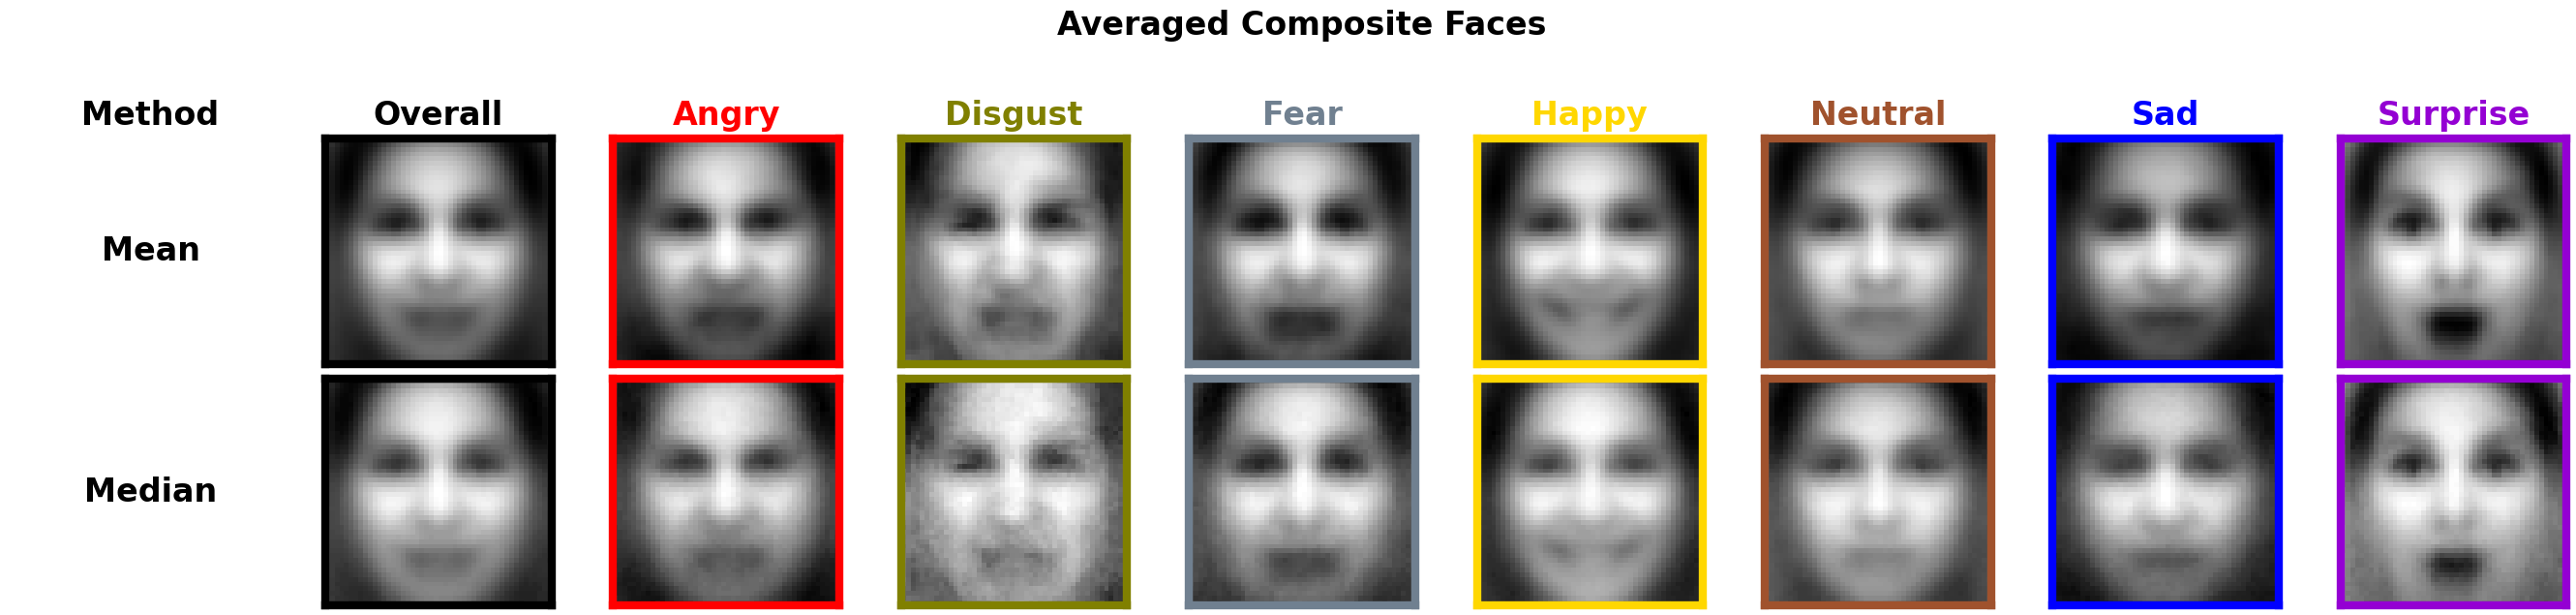

In [23]:
generate_samples_figure(
        image_dict=composite_face_dict, 
        row_labels=row_labels, 
        plot_params=plot_params, 
        color_dict=color_dict, 
        title='Averaged Composite Faces',
        text_box=None,
        save_path=composite_imgs_save_path,
        dpi=150
)

In [24]:
pixel_imgs_save_path = os.path.join('imgs', 'comparisons', 'pixel_intensities.png')

Plot saved to imgs/comparisons/pixel_intensities.png


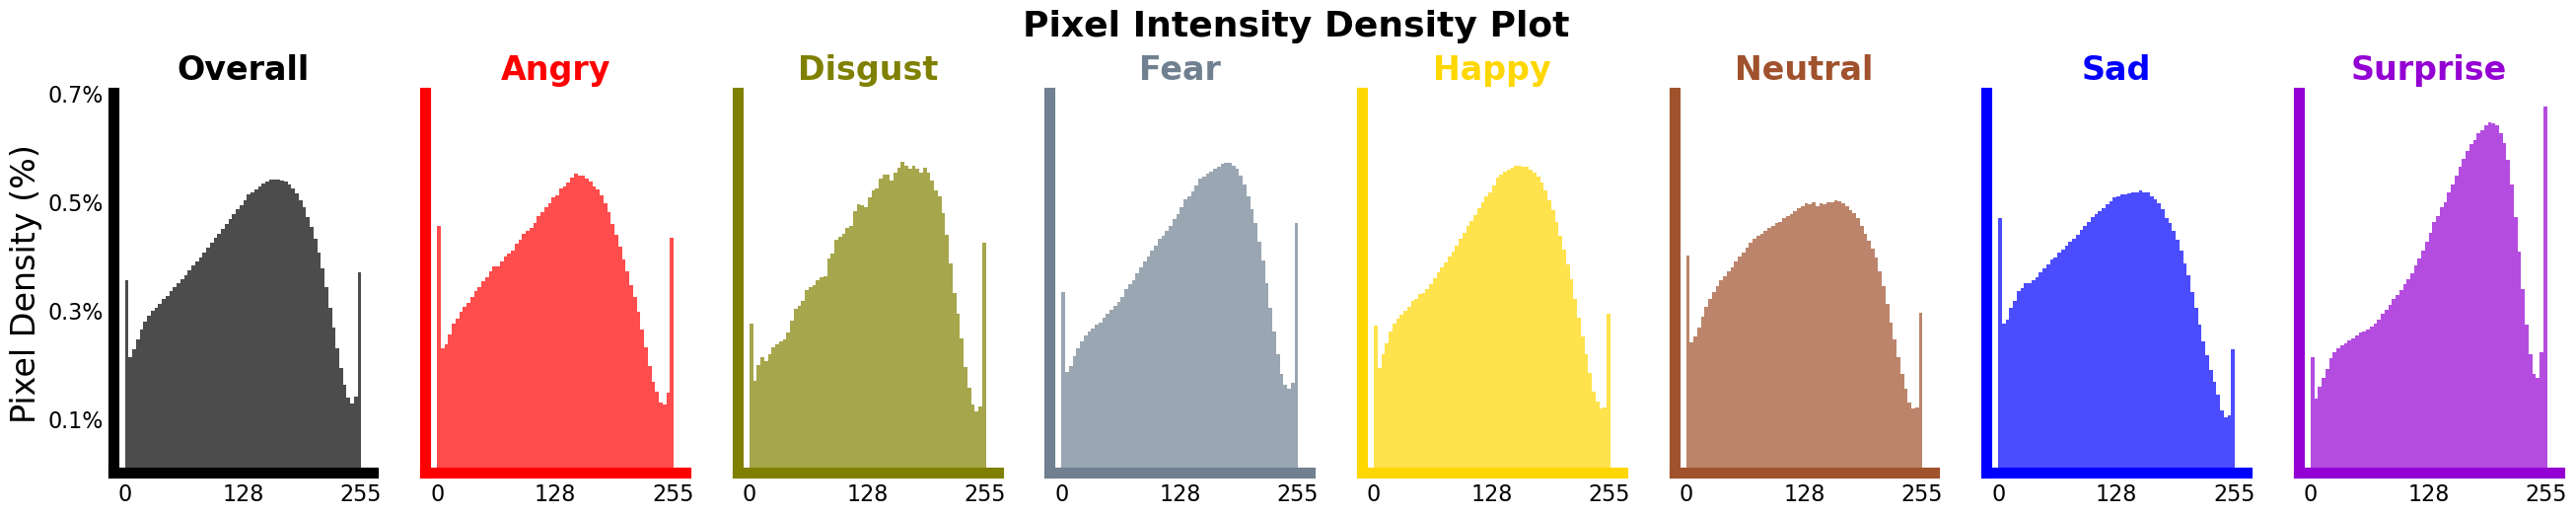

In [25]:
generate_pixel_intensities(X_train, y_train, color_dict=color_dict, save_path=pixel_imgs_save_path)

## Feature Extraction

Generates averaged emotional faces by category as reconstructed from a varying number of components using unsupervised decomposition analyses

In [27]:
decomp_models = load_json('./configs/unsupervised_models.json')

In [28]:
decomp_models

{'Analyses': [{'type': 'PCA',
   'normalization': ['none', 'minmax', 'standard'],
   'total_components': 100,
   'components_for_reconstruction': [1, 10, 25, 50, 75]},
  {'type': 'NMF',
   'normalization': ['none'],
   'total_components': 50,
   'components_for_reconstruction': [1, 5, 15, 30]},
  {'type': 'FastICA',
   'normalization': ['standard'],
   'total_components': 50,
   'components_for_reconstruction': [1, 5, 15, 30]}],
 'FastICA': {'module': 'sklearn.decomposition',
  'class': 'FastICA',
  'params': {'max_iter': 500, 'tol': 0.0001, 'random_state': 42}},
 'NMF': {'module': 'sklearn.decomposition',
  'class': 'NMF',
  'params': {'init': 'nndsvda',
   'max_iter': 500,
   'tol': 0.0001,
   'random_state': 42}},
 'PCA': {'module': 'sklearn.decomposition',
  'class': 'PCA',
  'params': {'whiten': True, 'svd_solver': 'auto', 'random_state': 42}}}

In [29]:
decomp_models.keys()

dict_keys(['Analyses', 'FastICA', 'NMF', 'PCA'])

In [30]:
# for decomp_model, norm, comps_list in zip(model_keys, norm_options, components_list):
#     max_comp = decomp_models[decomp_model]['params']['n_components']
#     results, used_components = run_dimensionality_reduction(
#         X=X_train, 
#         y=y_train, 
#         components_list=comps_list, 
#         model_dict=decomp_models[decomp_model], 
#         normalize='none'
#     )

#     dim_reduce_save_path = os.path.join('imgs', 'comparisons', f'{decomp_model}_{norm}_max_comp_{max_comp}_faces.png')
    
#     # Generate a matrix plot of the results
#     plot_face_matrix(
#             results, 
#             row_labels=used_components, 
#             group_colors=color_dict,
#             save_path=dim_reduce_save_path,
#             method=decomp_model,
#             norm=norm,
#             total_components=max_comp)    
#     print(f"Completed: method={decomp_model}, normalization={norm}, components_list={comps_list}, max_components={max_comp}")

In [31]:
# for a in analyses:
#     for norm in a['normalization']:
#         print(a['type'], norm)
#         type = a['type']
#         print(decomp_models[type])

In [32]:
model_runs = decomp_models['Analyses']

In [33]:
for run in model_runs:
    print(run)

{'type': 'PCA', 'normalization': ['none', 'minmax', 'standard'], 'total_components': 100, 'components_for_reconstruction': [1, 10, 25, 50, 75]}
{'type': 'NMF', 'normalization': ['none'], 'total_components': 50, 'components_for_reconstruction': [1, 5, 15, 30]}
{'type': 'FastICA', 'normalization': ['standard'], 'total_components': 50, 'components_for_reconstruction': [1, 5, 15, 30]}


In [34]:
# Run analysis for a single configuration
for run in model_runs:
    if run['type']=='NMF':
        for norm in run['normalization']:
            try:
                results, valid_components = run_dimensionality_reduction(
                    X=X_train, 
                    y=y_train, 
                    model_dict=decomp_models[run['type']],
                    normalization=run["normalization"],
                    total_components=run["total_components"],
                    components_for_reconstruction=run["components_for_reconstruction"]
                )
            
                # Access valid components used for mapping
                print("Valid components used for reconstruction:", valid_components)
                # Access reconstructed images
                for category, reconstruction in results.items():
                    print(f"Category: {category}, Reconstruction shape: {reconstruction.shape}")
            except Exception as e:
                print(f"Error encountered: {e}")


Error encountered: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2304 is different from 1)


In [67]:
import numpy as np
from sklearn.decomposition import NMF

# Sample data X
# Replace this with your actual data
# X = np.random.rand(100, 64)  # Example data with 100 samples and 64 features

# Instantiate and fit the NMF model with 50 components
total_components = 50
nmf = NMF(n_components=total_components, init='random', random_state=42)
X_transformed = nmf.fit_transform(X_train)

# Get the full set of components (basis matrix)
components = nmf.components_

# Partial reconstructions using 1, 5, and 10 components
partial_reconstructions = {}
for n_components in [1, 5, 10]:
    # Create partial reconstruction by limiting to the first n_components
    X_partial = X_transformed[:, :n_components] @ components[:n_components, :]
    partial_reconstructions[f'{n_components}_components'] = X_partial

# Output partial reconstructions for inspection
for key, reconstruction in partial_reconstructions.items():
    print(f"Reconstruction with {key}:")
    print(reconstruction)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Reconstruction with 1_components:
[[0.         0.         0.         ... 0.2493794  0.14620448 0.31105703]
 [0.         0.         0.         ... 0.02551054 0.01495615 0.03181992]
 [0.         0.         0.         ... 0.0614151  0.03600603 0.07660456]
 ...
 [0.         0.         0.         ... 0.49863168 0.29233443 0.62195548]
 [0.         0.         0.         ... 0.06319594 0.03705009 0.07882584]
 [0.         0.         0.         ... 0.0491014  0.02878684 0.06124537]]
Reconstruction with 5_components:
[[ 6.47826293  5.36678108  3.63855538 ...  0.74643181  1.85672593
   2.83234495]
 [ 9.57552658  6.14953756  2.83711767 ...  0.02551054  0.01495615
   0.03181992]
 [ 6.65285065  6.02861067  4.47364918 ...  1.12684209  3.70249209
   5.45923372]
 ...
 [ 5.5462653   3.56188942  1.6432942  ...  0.8806144   1.6068631
   2.53527923]
 [12.41410321  7.97251131  3.67815506 ...  0.5343525   1.65845536
   2.43881485]
 [12.73163736  8.38099978  4.0637522  ...  0.79396297  2.59210146
   3.79755951